# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

Questa sezione è dedicata a domande più specifiche sui alcuni film o attori

In [27]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [29]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

## Analizzo e pulisco i dati

Reviews_rotten_df

In [30]:
reviews_rotten_df.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [32]:
reviews_rotten_df = reviews_rotten_df[['movie_title','critic_name','top_critic','publisher_name','review_type','review_score']]
reviews_rotten_df

,movie_title,critic_name,top_critic,publisher_name,review_type,review_score
0,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN
1,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN
2,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN
3,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5
4,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN
...,...,...,...,...,...,...
1129882,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5
1129883,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5
1129884,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+
1129885,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5


In [22]:
duplicati = reviews_rotten_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

120907


In [23]:
reviews_rotten_df = reviews_rotten_df.drop_duplicates()

## Il film “Please Give” è piaciuto più al pubblico o ai critici?

In [38]:
please_give_df = reviews_rotten_df[reviews_rotten_df['movie_title']=='Please Give'].copy()

In [46]:
def add_count_on_bars(ax):
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

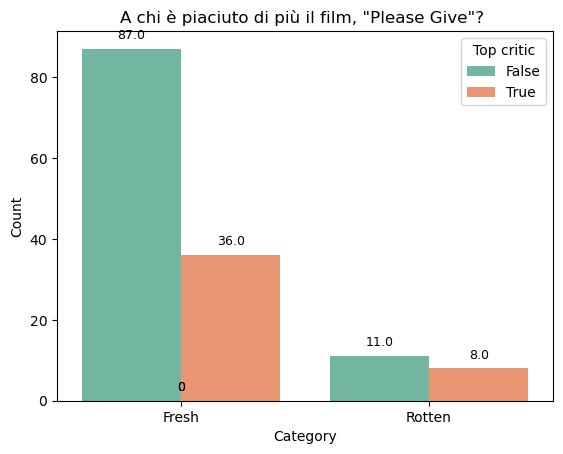

In [47]:
ax = sns.countplot(x='review_type', hue='top_critic', data=please_give_df, palette='Set2')
plt.title('A chi è piaciuto di più il film, "Please Give"? ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Top critic')
add_count_on_bars(ax)
plt.show()